# NLTK 자연어 처리 패키지
- 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
# 주요기능
- 말뭉치 : 분석작업을 위한 샘플 문서 집합
- 토큰 생성 : 분석을 위해 단어, 문장 등의 토큰을 생성
- 형태소 분석 : 명사, 형용사, 동사 등등...
- 품사태깅 : 형태소에 태그를 붙혀 줌

In [1]:
import nltk

In [2]:
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
emma_raw=nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [8]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:10000])[0])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.


In [9]:
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[:100]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [10]:
from nltk.tokenize import RegexpTokenizer
retoken=RegexpTokenizer("[\w]+")
retoken.tokenize(emma_raw[:100])

['Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a']

# 형태소 분석
- 언어학에서 일정한 의미가 있는 가장 작은 단위
- 보통 자연어 처리에서 토큰으로 형태소를 이용
- 형태소 분석은 단어로부터 어근, 접두사, 접미사, 품사 등의 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업

- 형태소 분석 예
1. 어간 추출
2. 원형 복원
3. 품사 부착

In [11]:
from nltk.stem import PorterStemmer,LancasterStemmer
st1=PorterStemmer()
st2=LancasterStemmer()

words=['fly','flies','flying','flew','flown']

print("Porter Stemmer: ",[st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer:  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


True

In [13]:
lm=WordNetLemmatizer()
[lm.lemmatize(w, 'v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

# 품사태깅
- 형태소에 품사를 부착해주는 것
- NNP : 단수 고유명사
- VB : 동사
- VBP : 동사 현재형
- TO : to 전치사
- NN : 명사
- DT : 관형사


In [15]:
nltk.help.upenn_tagset("NN") #태그에 대한 도움을 받을 때 사용

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [16]:
from nltk.tag import pos_tag
sentence='Emma refused to permit us to abtain the fefuse permit'
tagged_list=pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('abtain', 'VB'),
 ('the', 'DT'),
 ('fefuse', 'NN'),
 ('permit', 'NN')]

In [20]:
nouns_list=[t[:] for t in tagged_list if t[1]=='NN']
nouns_list

[('fefuse', 'NN'), ('permit', 'NN')]

untag : 태그 튜플을 제거

In [21]:
from nltk.tag import untag
untag_list=untag(tagged_list)
untag_list

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'abtain',
 'the',
 'fefuse',
 'permit']

In [24]:
from nltk import Text
text=Text(retoken.tokenize(emma_raw))
print(text)


<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


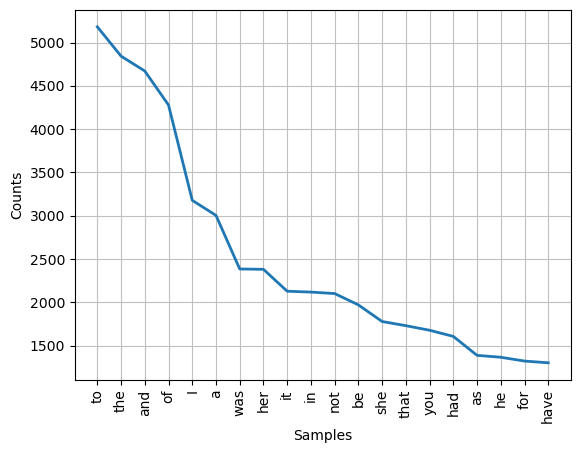

In [26]:
import matplotlib.pyplot as plt
text.plot(20)
plt.show()

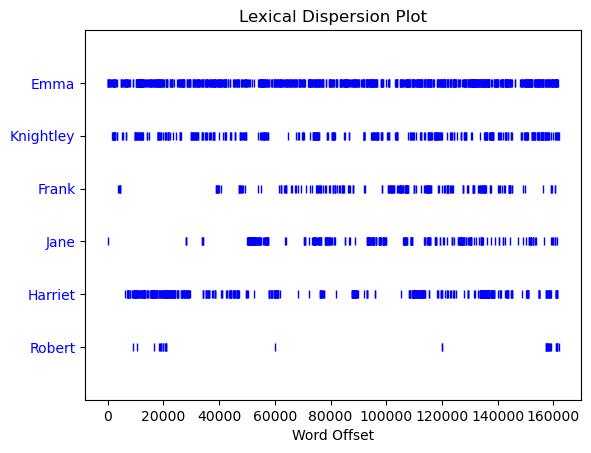

In [28]:
text.dispersion_plot(['Emma','Knightley','Frank','Jane','Harriet','Robert'])

In [30]:
text.concordance("emma") #단어가 사용된 위치를 직접 표시하여 문맥을 확인할 수 있다.

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [31]:
text.similar('emma') #문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [35]:
text.common_contexts("emma",'i')

No common contexts were found


FreqDist : 문서에 사용된 단어의 사용빈도 정보를 담는 클래스
Text 클래스에서 vocab 메소드로 추출할 수 있음

In [37]:
fd=text.vocab()
type(fd)
print(fd)

<FreqDist with 7723 samples and 161983 outcomes>


In [38]:
fd.most_common(20)

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301)]

In [42]:
stopwords=['Mr.','Mrs.','Miss','Mr','Mrs','Dear']
emma_tokens=pos_tag(retoken.tokenize(emma_raw))
name_list=[t[0] for t in emma_tokens if t[1]=='NNP' and t[0] not in stopwords]
fd_names=FreqDist(name_list)
fd_names.most_common(10)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

In [44]:
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')
#전체 단어수, Emma의 빈도수, Emma의 빈도수/전체단어수

(7863, 830, 0.10555767518758744)

워드클라우드
- 단어의 사용빈도에 따라 시각화하는 도구

In [45]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'